### paper plots

pretty plots for final paper

In [1]:
import autoencodeSVJ.utils as utils
import autoencodeSVJ.evaluate as ev

Using TensorFlow backend.


In [2]:
top = utils.summary().cfilter(['*auc*', 'target_dim', 'filename', 'signal_path', 'batch*', 'learning_rate']).sort_values('mae_auc')[::-1]
top.head(10)

,batch_size,filename,learning_rate,mae_auc,mse_auc,signal_path,target_dim
96,32,hlf_eflow3_7_v159,0.00146312,0.902315,0.900523,data/all_signals/3000GeV_0.30/base_3/*.h5,7
179,32,hlf_eflow3_7_v38,0.000910648,0.897851,0.891363,data/all_signals/3000GeV_0.30/base_3/*.h5,7
255,64,hlf_eflow3_9_v10,0.0005,0.894303,0.89324,data/all_signals/1500GeV_0.15/base_3/*.h5,9
23,64,hlf_eflow3_6_v3,0.0005,0.890441,0.889744,data/all_signals/2000GeV_0.30/base_3/*.h5,6
136,32,hlf_eflow3_7_v195,0.000838053,0.884811,0.884847,data/all_signals/3000GeV_0.30/base_3/*.h5,7
87,32,hlf_eflow3_7_v150,0.003303,0.882353,0.88152,data/all_signals/3000GeV_0.30/base_3/*.h5,7
139,32,hlf_eflow3_7_v198,0.00251508,0.881822,0.880606,data/all_signals/3000GeV_0.30/base_3/*.h5,7
86,32,hlf_eflow3_7_v15,0.000251868,0.881179,0.88605,data/all_signals/3000GeV_0.30/base_3/*.h5,7
44,32,hlf_eflow3_7_v111,0.000249307,0.880655,0.876243,data/all_signals/3000GeV_0.30/base_3/*.h5,7
53,32,hlf_eflow3_7_v12,0.000662266,0.880288,0.88518,data/all_signals/3000GeV_0.30/base_3/*.h5,7


In [12]:
import glob
import pandas as pd
l = {}
for f in glob.glob('TEST/*'):
    lp = pd.read_csv(f)
    fp = f.split('/')[-1]
    lp['name'] = fp
    l[fp] = lp
l = pd.concat(l)

l['mass_nu_ratio'] = zip(l.mass, l.nu)
# l = l.drop(['Unnamed: 0', 'mass', 'nu'], axis=1).T
l0 = l.pivot('mass_nu_ratio', 'name', 'auc')

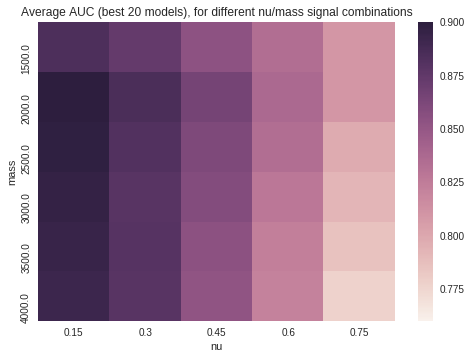

In [189]:
n = 20
lp = l0.iloc[:,np.argsort(l0.mean()).values[::-1][:n]].mean(axis=1).to_frame().reset_index().rename(columns={0: 'auc'})
lp['mass'] = lp.mass_nu_ratio.apply(lambda x: x[0])
lp['nu'] = lp.mass_nu_ratio.apply(lambda x: x[1])
lp = lp.drop('mass_nu_ratio', axis=1).pivot('mass','nu', 'auc')
sns.heatmap(lp, vmax=.9, vmin=0.76)
plt.title('Average AUC (best {} models), for different nu/mass signal combinations'.format(n))
plt.show()

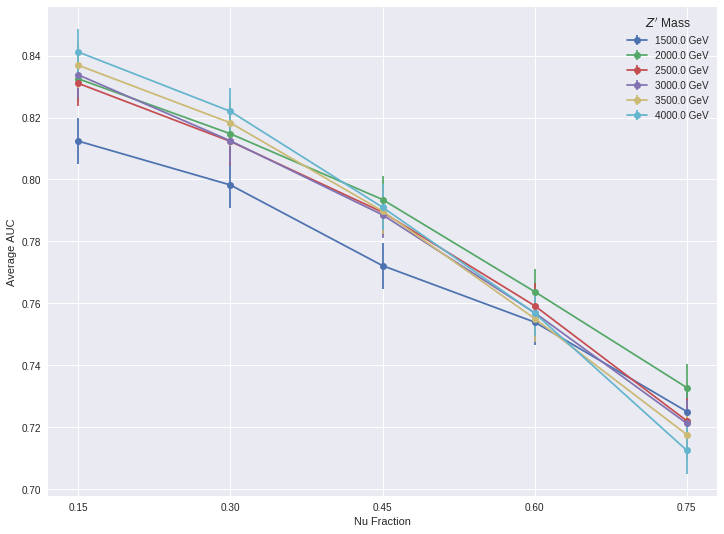

In [190]:
c = l0.iloc[:,:15]
# c = 5
means = c.mean(axis=1)
masses, nus = np.asarray(map(np.asarray, means.index)).T
aucs = means.values

plt.figure(figsize=(12,9))
for mass in sorted(set(masses)):
    plt.errorbar(nus[masses == mass], aucs[masses == mass], marker='o', yerr=np.std(c.std(axis=1)), label='{} GeV'.format(mass))
plt.xlabel('Nu Fraction')
plt.ylabel('Average AUC')
plt.xticks(np.unique(nus))
plt.legend(title=r'$Z^{\prime}$ Mass')
plt.show()

These things are really important. 'data_holder' basically loads all signal data into memory at once, 

In [204]:
import  glob
eflow_base = 3

d = ev.data_holder(
    qcd='data/background/base_3/*.h5',
    **{os.path.basename(p): '{}/base_{}/*.h5'.format(p, eflow_base) for p in glob.glob('data/all_signals/*')}
)
d.load()

found 31 datasets


In [210]:
reload(ev)

<module 'autoencodeSVJ.evaluate' from '/afs/cern.ch/user/l/llepotti/.local/lib/python2.7/site-packages/autoencodeSVJ/evaluate.pyc'>

In [212]:
tf.reset_default_graph()
a = ev.auc_getter('hlf_eflow3_7_v159', times=True)
norm, err, recon = a.get_errs_recon(d)
aucs = a.get_aucs(err)
fmt = a.auc_metric(aucs)

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_7_v159.summary'
:: TIME: init executed in 0.87 s
:: TIME: test dataset executed in 0.08 s
train_shell :: using saved model
:: TIME: recon gen executed in 17.49 s
:: TIME: auc grab executed in 0.63 s


In [127]:
# totals = []
# for name in top.filename:
#     tf.reset_default_graph()
#     a = auc_getter(name, times=True)
#     norm, err, recon = a.get_errs_recon(d)
#     aucs = a.get_aucs(err)
#     fmt = a.auc_metric(aucs)
#     fmt.to_csv('TEST/{}'.format(name))
#     totals.append(fmt)

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_7_v159.summary'
:: TIME: init executed in 1.00 s
:: TIME: test dataset executed in 0.26 s
train_shell :: using saved model
:: TIME: recon gen executed in 37.08 s
:: TIME: auc grab executed in 0.86 s
found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_7_v38.summary'
:: TIME: init executed in 1.10 s
:: TIME: test dataset executed in 0.18 s
train_shell :: using saved model
:: TIME: recon gen executed in 30.30 s
:: TIME: auc grab executed in 0.75 s
found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_9_v10.summary'
:: TIME: init executed in 1.09 s
:: TIME: test dataset executed in 0.09 s
train_shell :: using saved model
:: TIME: recon gen executed in 28.76 s
:: TIME: auc grab executed in 0.76

In [ ]:
totals[0].auc.mean()

KeyboardInterrupt: 

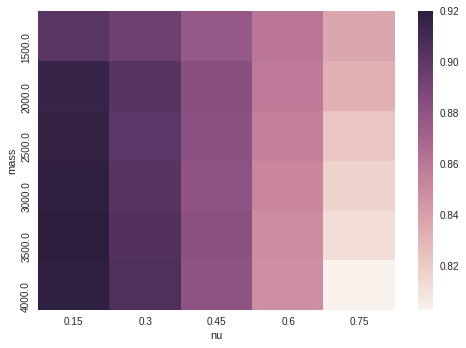

In [105]:
import seaborn as sns

sns.heatmap(fmt.pivot('mass', 'nu', 'auc'))

plt.show()

data_table :: plotting distrubution(s) for table(s) ['Zprime_1500GeV_075 norm error', 'Zprime_1500GeV_060 norm error', 'Zprime_1500GeV_045 norm error', 'Zprime_1500GeV_015 norm error', 'Zprime_1500GeV_030 norm error', 'qcd norm error']


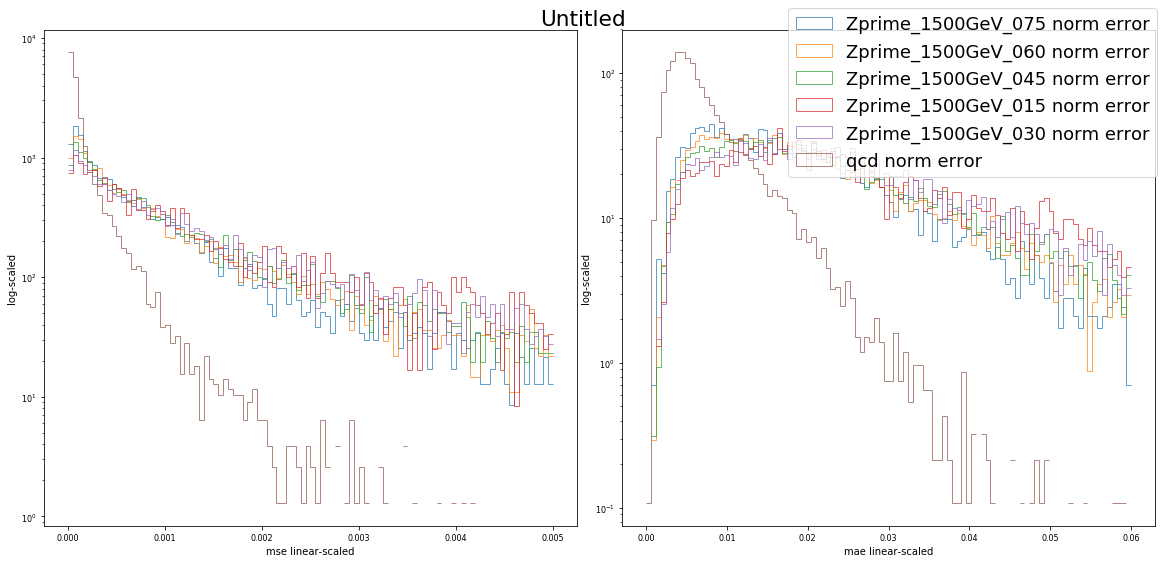

In [16]:
err[0].plot(err[1:], normed=1, yscale='log', bins=100, figloc='upper right', rng=((0, 0.005), (0,0.06)))

found 6 datasets


In [28]:
e = ev.ae_evaluation(name=elt)

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_7_v159.summary'
train_shell :: using saved model


In [24]:
%run autoencode/module/autoencodeSVJ/evaluate.py

def load_for_training(train_path, test_path, signal_path):
    
    train = signal_element(train_path, 'train')
    train._load()
    
    test = data_holder(
        test=test_path,
        signal=signal_path
    )
    test.load()
    
    return train, test
    
train, test = load_for_training(
    'data/background/base_3/QCD_train.h5',
    'data/background/base_3/QCD_test.h5',
    'data/all_signals/1500GeV_0.15/base_3/*.h5'
)



found 2 datasets


In [6]:
%run autoencode/module/autoencodeSVJ/evaluate.py

import glob

def ae_load(name):
    sd = utils.load_summary(utils.summary_by_name(name))
    
    (eflow,
     hlf,
     hlf_to_drop,
     eflow_base,
     seed,
     qcd_path,
     test_split) = [sd[k] for k in ['eflow', 'hlf', 'hlf_to_drop', 'eflow_base', 'seed', 'qcd_path', 'test_split']]

    d = data_holder(
        QCD=qcd_path,
        **{os.path.basename(p): '{}/base_{}/*.h5'.format(p, eflow_base) for p in glob.glob('data/all_signals/*') if p.split('/')[-1].startswith('1500')}
    )
    
    d.load()
    
    return d

import time

t0 = time.time()
d = ae_load('hlf_eflow3_7_v159')
print time.time() - t0

t0 = time.time()
e = ev.ae_evaluation(name='hlf_eflow3_7_v159')
print time.time() - t0

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_7_v159.summary'
found 6 datasets
2.47959303856
found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_7_v159.summary'
train_shell :: using saved model
5.6034090519


In [ ]:
d = 

In [53]:
import h5py

d = utils.data_loader(name='QCD')


for s in glob.glob('data/background/base_3/*.h5'):
    d.add_sample(s)b


data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/base_3/data_0_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/base_3/data_6_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/base_3/data_3_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/base_3/data_1_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/base_3/data_2_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background/base_3/data_4_data.h5'
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencode

In [60]:
files[0]['jet_features']

[u'data', u'labels']

In [11]:
d.add_attribute(name='norm', function=lambda self: self.data.norm(d.QCD))

AttributeError: 'signal_element' object has no attribute 'norm'

data_table :: plotting distrubution(s) for table(s) ['Zprime_1500GeV_075 event features', 'Zprime_1500GeV_060 event features', 'Zprime_1500GeV_045 event features', 'Zprime_1500GeV_015 event features', 'Zprime_1500GeV_030 event features', 'QCD event features']


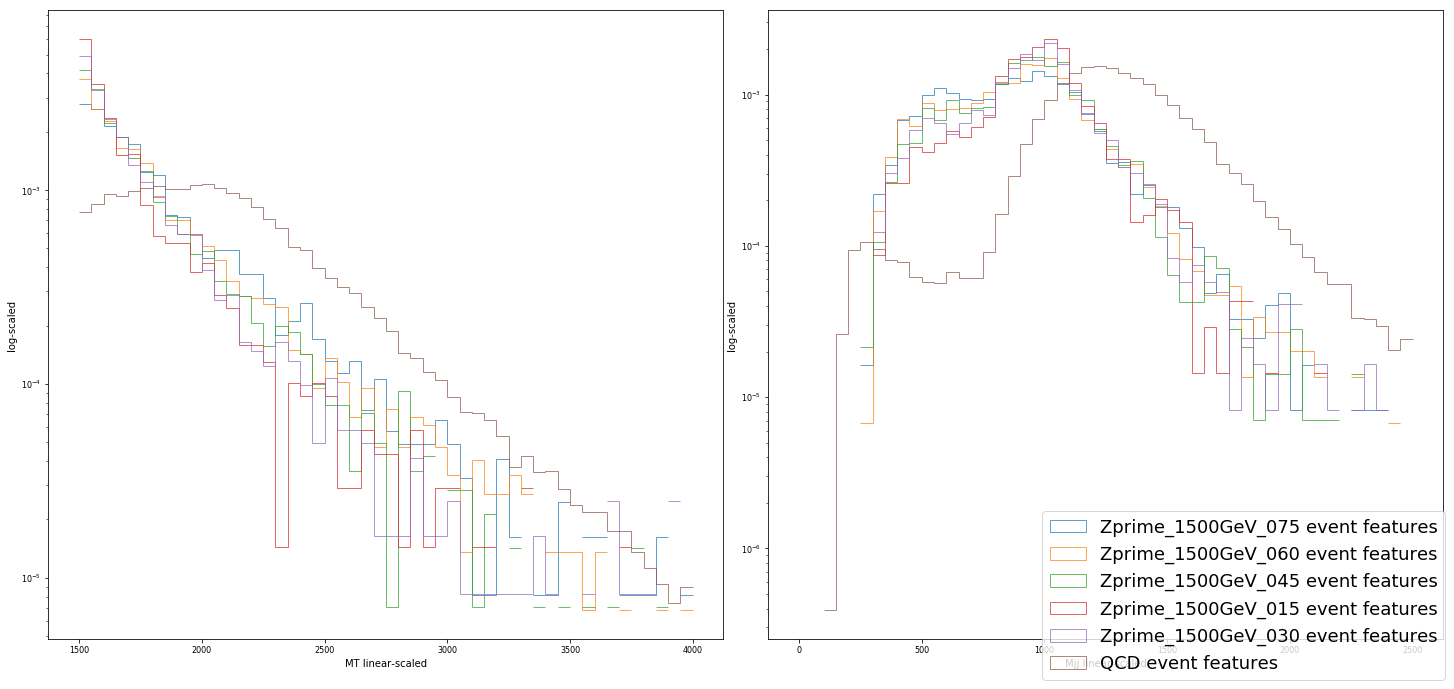

In [4]:
key = 'event'

data = map(lambda x: x.cfilter(['MT', 'Mjj']), d.get(key))

data[0].plot(
    data[1:], normed=1, yscale='log', cols=2, 
    bins=50, figloc='lower right', figname='', 
    rng=((data[0].MT.min(), 4000),(0,2500)), figsize=(20,10)
)



In [11]:
import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
matplotlib.rcParams.update({'font.size': 16})
from collections import OrderedDict as odict

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def plotdata(elt_dicts, filter=["*"], drop=[], names="*"):
    if isinstance(elt_dicts, odict):
        elt_dicts = {'NONE': elt_dicts}
    
    modified = {}
    elt_dict = {}
    for k,v in elt_dicts.items():
        d = v.copy()
        for sub_k in v:
            if k == 'NONE':
                key = sub_k
                d[key] = v[sub_k]
            else:
                key = (sub_k + ' ' + k).strip()
                d[key] = v[sub_k]
                del d[sub_k]
                if sub_k not in modified:
                    modified[sub_k] = []
                modified[sub_k].append(key)

        elt_dict.update(d)
        
    names = utils.parse_globlist(match_list=elt_dict.keys(), glob_list=names)
    
    for name in names.copy():
        if name in modified:
            for subn in modified[name]:
                names.add(subn)
    
    nameset = names.copy()
    names = []
    
    for elt in order:
        add = [] 
        for name in nameset:
            if name.startswith(elt):
                add.append(name)
        names += sorted(add)

    keep = {}
    
    for name in names:
        keep[name] = elt_dict[name].cdrop(drop).cfilter(filter)
    
    
    assert len(keep) > 0
    ref = keep.values()[0]
    cols = []
    
    for c in ref.columns:
        if all([c in v for v in keep.values()]):
            cols.append(c)
#     cols = set.intersection(*[set(v.columns) for v in keep.values()])
    
    ret = odict()
    for c in list(cols):
        ret[c] = odict()
        for name in names:
            ret[c][name] = keep[name][c]
        
    return ret


#     plt.legend(fontsize=20)   
styles = {
    'SVJ': {
        'facecolor': 'm',
        'histtype': 'step',
        'fill': True,
        'edgecolor': 'k',
        'label': r'SVJ',
        'alpha': 0.4,
#         'hatch': '/'
    },
    'qcd': {
        'facecolor': 'y',
        'histtype': 'step',
        'fill': True,
        'edgecolor': 'k',
        'label': r'QCD',
        'alpha': 0.4

    },
    'ttbar': {
        'facecolor': 'C0',
        'label': r'$t\bar{t}$',
        'edgecolor': 'w',
        'hatch': '//',
        'fill': True,
        'histtype': 'step',
        'alpha': 0.4

    }
}

order = [
    'ttbar',
    'SVJ',
    'qcd'
]


var_styles = {
    'ChargedFraction': {
        'xlabel': r'Charged Fraction',
        'fontsize': 20,
    },
    'Pt': {
        'xlabel': r'$\displaystyle p_{T}$',
        'fontsize': 20,
    },
    'Eta': {
        'xlabel': r'$\displaystyle \eta$',
        'fontsize': 20,
#         'range': (0., 0.7),
    },
    'Phi': {
        'xlabel': r'$\displaystyle \phi$',
        'fontsize': 20,
#         'range': (0., 0.7),
    },
    'M': {
        'xlabel': 'Mass',
        'fontsize': 20,
    },
    'mae': {
        'xlabel': 'Reconstruction Error (MAE)',
        'fontsize': 30,
    },
    'PTD': {
        'xlabel': 'PTD',
        'fontsize': 20,
    },
    'Axis2': {
        'xlabel': 'Axis_2',
        'fontsize': 20,
    }
}

# more than needed
for i in range(100):
    var_styles['eflow {}'.format(i)] = {}
    var_styles['eflow {}'.format(i)]['xlabel'] = "Variable {}".format(i)
    var_styles['eflow {}'.format(i)]['fontsize'] = 20
    

In [23]:
m1 = 20./4.
m2 = 14./3.

In [19]:
def pre_eflow(e, bins=50, names="*", ylabel=None, replc='eflow', normed=1, xlog=False, ylog=False, pileup=False):
    data = plotdata(e.dists_dict, filter='eflow *', names=names)
    # print data

    
    fs = 12
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    matplotlib.rcParams.update({'font.size': 18})
    
    rows, cols = (3,4)
    f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
    axs = axs.flatten()
#     f.suptitle("EnergyFlow Polynomial Distributions", y=1.02, fontsize=30)
    ogbins = bins
    i = 0
    for d,v in data.items():
        ax = axs[i]
        
        if 'bins' in var_styles[d]:
            bins = var_styles[d].pop('bins')
        else:
            bins = ogbins
            
        if 'range' in var_styles[d]:
            rng = var_styles[d].pop('range')
        else:
            rng = map(lambda f: f(map(f, v.values())), [min, max])
        
        for k,datum in v.items():
            nbins = bins
            if ylog:
                ax.set_yscale('log', nonposy='clip')
            if ylabel is not None:
                ax.set_ylabel(ylabel)
            
            if pileup:
                datum[datum < rng[0]] = rng[0]
                datum[datum > rng[1]] = rng[1]
            
            if xlog:
                nbins = np.geomspace(rng[0], rng[1], bins)
                
            ax.hist(datum, range=rng, bins=nbins, normed=normed, **styles[k])
            ax.set_xlabel(**var_styles[d])
#             ax.set_yscale('log')
            if xlog:
                ax.set_xscale('log')
        i += 1
    
    plt.legend(fontsize=20)


In [20]:
def pre_hlf(e, bins=50, names="*", ylabel=None, normed=1, xlog=False, ylog=False, pileup=False):
    data = plotdata(e.dists_dict, drop='eflow *', names=names)
    # print data

    
    fs = 12
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    matplotlib.rcParams.update({'font.size': 18})
    
    rows, cols = (2,3)
    f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
    axs = axs.flatten()
    f.suptitle("High-Level-Feature Distributions", y=1.02, fontsize=30)
    ogbins = bins
    i = 0
    for d,v in data.items():
        if 'bins' in var_styles[d]:
            bins = var_styles[d].pop('bins')
        else:
            bins = ogbins
            
        if 'range' in var_styles[d]:
            rng = var_styles[d].pop('range')
        else:
            rng = map(lambda f: f(map(f, v.values())), [min, max])
        ax = axs[i]
        for k in v.keys():
            datum = v[k]
            if pileup:
                datum[datum < rng[0]] = rng[0]
                datum[datum > rng[1]] = rng[1]
            nbins = bins
            if xlog:
                nbins = np.geomspace(rng[0], rng[1], bins)
                
            ax.hist(datum, range=rng, bins=nbins, normed=normed, **styles[k])
            ax.set_xlabel(**(var_styles[d]))
#             ax.set_yscale('log')
            if xlog:
                ax.set_xscale('log')
            if ylog:
                ax.set_yscale('log', nonposy='clip')
            if ylabel is not None:
                ax.set_ylabel(ylabel)
            
        i += 1
    
    handles,labels = ax.get_legend_handles_labels()
    plt.figlegend(handles, labels, loc=(.7,.3), fontsize=30)
    for x in axs[i:]:
        f.delaxes(x)
    
#     plt.legend(fontsize=20)


In [21]:
def post_all(e, bins=50, names="*", ylabel=None, normed=1, xlog=False, ylog=False, pileup=False):
    recon_kwd = '(pred)'
    dists = e.dists_dict.copy()
    dists['qcd'] = e.test
    data = plotdata({recon_kwd : e.recons_dict, 'NONE': dists}, names=names)

    fs = 12
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    matplotlib.rcParams.update({'font.size': 18})
    
    rows, cols = (5,5)
    f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
    axs = axs.flatten()
    f.suptitle("Feature Reconstructions", y=1.02, fontsize=30)
    ogbins = bins
    i = 0
    for d,v in data.items():
        if 'bins' in var_styles[d]:
            bins = var_styles[d].pop('bins')
        else:
            bins = ogbins
            
        if 'range' in var_styles[d]:
            rng = var_styles[d].pop('range')
        else:
            rng = map(lambda f: f(map(f, v.values())), [min, max])
        ax = axs[i]
        
#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
        for k in v.keys():
            
            datum = v[k]
            recon = False
            kp = k 
            if recon_kwd in k:
                recon = True 
                
                kp = k.replace(recon_kwd, '').strip()
            
            if pileup:
                datum[datum < rng[0]] = rng[0]
                datum[datum > rng[1]] = rng[1]
            nbins = bins
            if xlog:
                nbins = np.geomspace(rng[0], rng[1], bins)
                
            style = styles[kp].copy()

#             style['alpha'] = 0.3
            if recon:
                hist,bins = np.histogram(datum, range=rng, bins=nbins, normed=normed)

                style['color'] = style['facecolor']
                style['linewidth'] = 2
                style['label'] = style['label'] + ', (pred)'
                for var in ['histtype', 'fill', 'facecolor', 'edgecolor', 'hatch', 'alpha']:
                    if var in style:
                        style.pop(var)
                
                ax.plot(bins[:-1] + np.diff(bins)/2., hist, marker='+', alpha=1, **style)
#                 ax.scatter(bins[:-1] + np.diff(bins)/2., hist, marker='+', edgecolor='k', **style)
            else:
                ax.hist(datum, range=rng,bins=nbins, normed=normed, **style)
            
            var_style = var_styles[d].copy()
            if 'Variable' in var_style['xlabel']:
                var_style['xlabel'] = "EFP " + var_style['xlabel'] 
                
            ax.set_xlabel(**(var_style))
#             ax.set_yscale('log')
            if xlog:
                ax.set_xscale('log')
            if ylog:
                ax.set_yscale('log', nonposy='clip')
            if ylabel is not None:
                ax.set_ylabel(ylabel)
            
        i += 1
    
    handles,labels = ax.get_legend_handles_labels()
    plt.figlegend(handles, labels, loc=(.802,.12), fontsize=40)
    for x in axs[i:]:
        f.delaxes(x)
    

def pre_all(e, bins=50, names="*", ylabel=None, normed=1, xlog=False, ylog=False, pileup=False):
#     recon_kwd = '(Reconstructed)'
    data = plotdata(e.dists_dict, names=names)

    
    fs = 18
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    matplotlib.rcParams.update({'font.size': 18})
    
    rows, cols = (5,5)
    f, axs = plt.subplots(rows, cols, figsize=(cols*m1, rows*m2))
    axs = axs.flatten()
#     f.suptitle("Input Variables", y=1.02, fontsize=30)
    ogbins = bins
    i = 0
    for d,v in data.items():
        if 'bins' in var_styles[d]:
            bins = var_styles[d].pop('bins')
        else:
            bins = ogbins
            
        if 'range' in var_styles[d]:
            rng = var_styles[d].pop('range')
        else:
            rng = map(lambda f: f(map(f, v.values())), [min, max])
        ax = axs[i]
        
#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
        for k in v.keys():
            
            datum = v[k]

            if pileup:
                datum[datum < rng[0]] = rng[0]
                datum[datum > rng[1]] = rng[1]
            nbins = bins
            if xlog:
                nbins = np.geomspace(rng[0], rng[1], bins)
                
            style = styles[k].copy()

#             style['alpha'] = 0.3
            ax.hist(datum, range=rng,bins=nbins, normed=normed, **style)
            
            var_style = var_styles[d].copy()
            if 'Variable' in var_style['xlabel']:
                var_style['xlabel'] = "EFP " + var_style['xlabel'] 
                
            ax.set_xlabel(**(var_style))
#             ax.set_yscale('log')
            if xlog:
                ax.set_xscale('log')
            if ylog:
                ax.set_yscale('log', nonposy='clip')
            if ylabel is not None:
                ax.set_ylabel(ylabel)
            
        i += 1
    
    handles,labels = ax.get_legend_handles_labels()
    plt.figlegend(handles, labels, loc=(.82,.165), fontsize=40)
    for x in axs[i:]:
        f.delaxes(x)
    
# pre_all(e, ylog=0, normed=1, pileup=1)

In [64]:
# pre_all(e, normed=1)
# post_all(e, ylog=0, normed=1)

In [65]:
def errors(e, bins=50, names="*", drop='mse', ylabel=None, normed=1, xlog=False, ylog=False, pileup=True, rng=None):
#     recon_kwd = '(Reconstructed)'
    data = plotdata(e.errs_dict, names=names, drop=drop)

    fs = 18
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    matplotlib.rcParams.update({'font.size': 30})
    
#     rows, cols = (1,1)
    f, ax = plt.subplots(1, 1, figsize=(2*m1, 2*m2))
    
#     f.suptitle("Input Variables", y=1.02, fontsize=30)
    ogbins = bins
    
    for d,v in data.items():
        if 'bins' in var_styles[d]:
            bins = var_styles[d].pop('bins')
        else:
            bins = ogbins
            
        if 'range' in var_styles[d]:
            rng = var_styles[d].pop('range')
        elif rng is None:
            rng = map(lambda f: f(map(f, v.values())), [min, max])
        
        
#         keys = reversed(sorted([k for k in v.keys() if len(k.split()) == 1]) + sorted([k for k in v.keys() if len(k.split()) > 1]))
        for k in v.keys():
            
            datum = v[k]

            if pileup:
                datum[datum < rng[0]] = rng[0]
                datum[datum > rng[1]] = rng[1]
            nbins = bins
            if xlog:
                nbins = np.geomspace(rng[0], rng[1], bins)
                
            style = styles[k].copy()

#             style['alpha'] = 0.3
            ax.hist(datum, range=rng,bins=nbins, normed=normed, **style)
            
            var_style = var_styles[d].copy()
            if 'Variable' in var_style['xlabel']:
                var_style['xlabel'] = "EFP " + var_style['xlabel'] 
                
            ax.set_xlabel(**(var_style))
#             ax.set_yscale('log')
            if xlog:
                ax.set_xscale('log')
            if ylog:
                ax.set_yscale('log', nonposy='clip')
            if ylabel is not None:
                ax.set_ylabel(ylabel)
            
    
    handles,labels = ax.get_legend_handles_labels()
    plt.figlegend(handles, labels, loc=(.7,.80), fontsize=30)




In [67]:
# errors(e, ylog=0, normed=1, bins=100)

(0.001, 1)

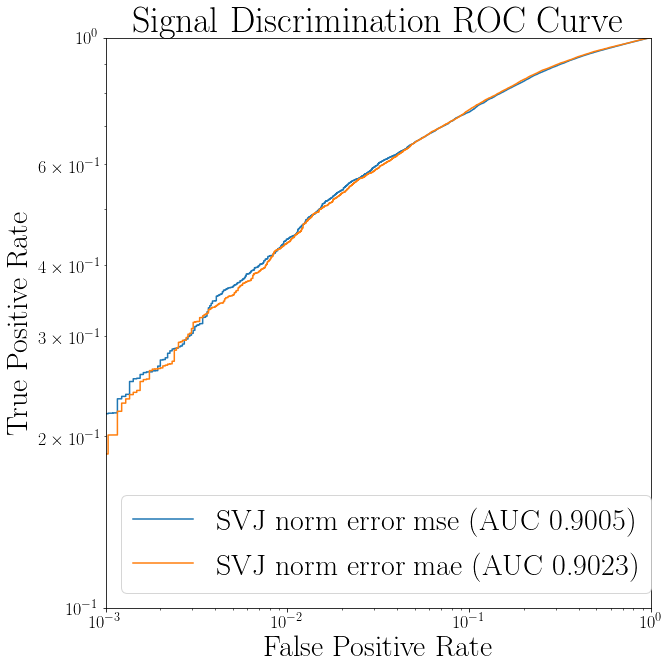

In [70]:
errs = e.roc(figsize=10, yscale='log', xscale='log', figname='SVJ vs. QCD error', fontsize=20, show_plot=0)

plt.figure(figsize=(10,10))
for err in errs:
    for typ in errs[err]:
        roc = errs[err][typ]['roc']
        auc = errs[err][typ]['auc']
        plt.plot(roc[0], roc[1], label='{} {} (AUC {:.4f})'.format(err, typ, auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Signal Discrimination ROC Curve')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylim(1e-1, 1)
plt.xlim(1e-3, 1)

In [72]:
# e.error(bins=100, yscale='linear', rng=((0.,0.05), (0.,0.16)))

In [13]:
import glob
import os

from collections import OrderedDict as odict

class data_element:
    def __init__(
        self,
        data,
        names,
        default='data',
    ):
        if not isinstance(names, (list,tuple,dict,set)):
            names = [names]
        if not isinstance(data, (list,tuple,dict,set)):
            data = [data]
            
        assert len(names) == len(data)
        
        self.size = len(names)
        self._obj_dict = odict()
        for name,datum in zip(names,data):
            setattr(self, name, datum)
            self._obj_dict[name] = getattr(self, name)

    def __iter__(
        self
    ):
        return iter(self._obj_dict)
            
    def __len__(
        self,
    ):
        return self.size
    

class data_handler:
    def __init__(
        self,
        hlf=True,
        eflow=True,
        hlf_to_drop=['Flavor', 'Energy'],
        **data_paths
    ):
        
        self._paths = set()
        self._names = set()
        for name,path in data_paths.items():
            self.add_path(name, path, hlf, eflow, hlf_to_drop)
            
    def add_path(
        self,
        name,
        path,
        hlf=1,
        eflow=1,
        hlf_to_drop=['Flavor', 'Energy']
    ):
        assert name not in self._names, "name '{}' is already in this object!! choose another".format(name)
        
        path = os.path.abspath(path)
        if not path.endswith('.h5'):
            path = os.path.join(path, '*.h5')
        
        assert path not in self._paths, "duplicate path being added! '{}' already in filelist".format(path)
        
        ret = utils.load_all_data(
            globstring=path,
            name=name, 
            include_hlf=hlf, 
            include_eflow=eflow,
            hlf_to_drop=hlf_to_drop,
        )
        
        elt = data_element(
            list(ret) + [utils.jet_flavor_split(to_split=ret[0], ref=ret[3])],
            ['data', 'jets', 'event', 'flavor', 'byflavor']
        )
        
        setattr(self, name + "_raw", ret)
        
        setattr(self, name, elt)
        
        self._paths.add(path)
        self._names.add(name)
        
        
#         setattr(self, name, ret[0])
#         setattr(self, name + "_jets", ret[1])
#         setattr(self, name + "_event", ret[2])
#         setattr(self, name + "_flavor", ret[3])


In [14]:
data = data_handler(
#     ttbar="data/ttbar_200pt/base_4/",
    qcd="data/background/base_4/",
    svj_old="data/signal/base_4/",
    svj_norad="data/signal_NoRadNoNu/base_4/",
    hlf_to_drop=['Energy', 'Flavor', 'Axis2', 'PTD']
)

In [29]:
for i in range(len(e.recons)):
    old = e.recons[i].name
    print(old)
    e.recons[i].name = e.recons[i].name.split('inv_normed')[0].strip().strip('\'')

'SVJ norm pred'
'qcd test norm pred'


data_table :: plotting distrubution(s) for table(s) ['SVJ norm error', 'qcd test norm error']


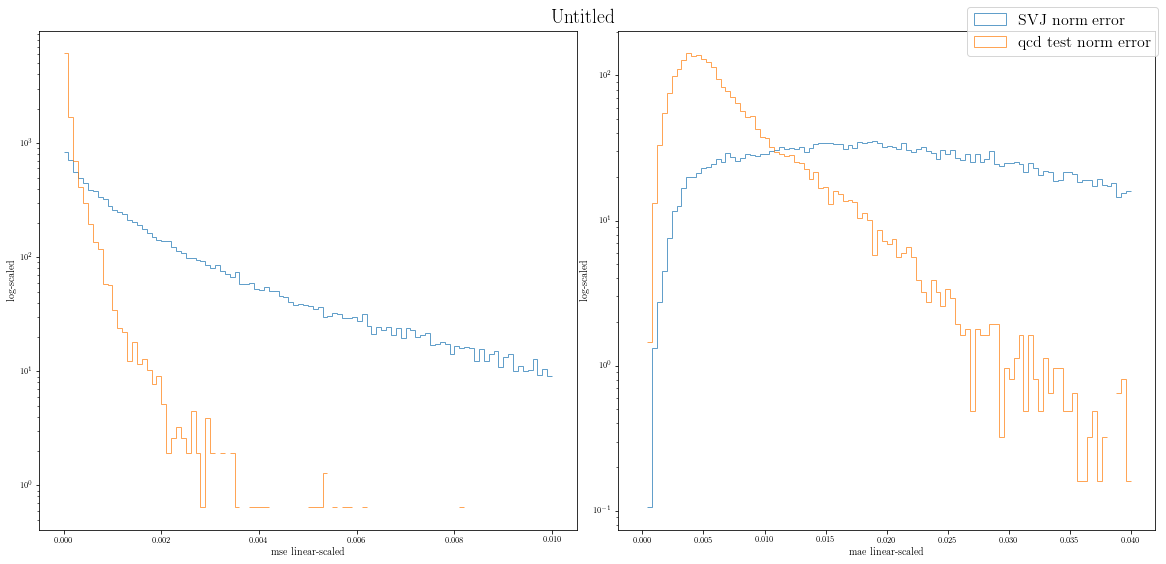

In [63]:
e.errs[0].plot(e.errs[1:], normed=1, yscale='log', bins=100, rng=((0, 0.01), (0, 0.04)), figloc='upper right')